<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/Credit_information_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Question 1] Confirmation of the content of the competition**

what to learn and what to predict


*   Learning various data of customer to predict the applicant can take a loan

What kind of file to create and submit to Kaggle


*   Predict a probability for the TARGET variable. The file should contain a header and have the following format:
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.

What kind of index value will the submitted work be evaluated by?


*   Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

**[Question 2] Learning and verification**

In [28]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/application_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/application_test.csv')
X_train = train.loc[:, train.columns != 'TARGET']
Y_train  = train.loc[:,'TARGET']

print (X_train)
print (Y_train)

        SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         Cash loans           M            N   
1           100003         Cash loans           F            N   
2           100004    Revolving loans           M            Y   
3           100006         Cash loans           F            N   
4           100007         Cash loans           M            N   
...            ...                ...         ...          ...   
307506      456251         Cash loans           M            N   
307507      456252         Cash loans           F            N   
307508      456253         Cash loans           F            N   
307509      456254         Cash loans           F            N   
307510      456255         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5 

In [6]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()

lista = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

for item in lista:
  Label.fit(X_train[item])
  X_train[item] = Label.transform(X_train[item])
  test[item] = Label.transform(test[item])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)
test = imp.transform(test)
print (X_train)
print (test)

[[1.00002e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [1.00003e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00004e+05 1.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [4.56253e+05 0.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 [4.56254e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.56255e+05 0.00000e+00 0.00000e+00 ... 2.00000e+00 0.00000e+00
  1.00000e+00]]
[[1.00001e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00005e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  3.00000e+00]
 [1.00013e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.00000e+00
  4.00000e+00]
 ...
 [4.56223e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 3.00000e+00
  1.00000e+00]
 [4.56224e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [4.56250e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  4.00000e+00]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
print(X_tr.shape)
print(y_tr.shape)

scaler = StandardScaler()
scaler.fit(X_tr)
#transform both training and validation set
X_tr= scaler.transform(X_tr)
X_val= scaler.transform(X_val)
print(X_tr)

In [19]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(solver = 'newton-cg').fit(X_tr, y_tr)
prediction_reg = reg.predict(X_val)
print ("Prediction of test set")
print (prediction_reg)

Prediction of test set
[0 0 0 ... 0 0 0]


In [21]:
# Evaluation for validation set
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy:', accuracy_score(y_val, prediction_reg))
print('Precision:', precision_score(y_val, prediction_reg)) 
print('Recall:', recall_score(y_val, prediction_reg)) 
print('F1 score"', f1_score(y_val, prediction_reg))

# print (evaluation_result)
print ('Prediction probability for 2 classes: ')
prediction_prob = reg.predict_proba(X_val)
print (prediction_prob)

Accuracy: 0.9189625120320508
Precision: 0.3597122302158273
Recall: 0.008076239702794379
F1 score" 0.01579778830963665
Prediction probability for 2 classes: 
[[0.76364255 0.23635745]
 [0.9741222  0.0258778 ]
 [0.86260413 0.13739587]
 ...
 [0.92929167 0.07070833]
 [0.8545781  0.1454219 ]
 [0.95391907 0.04608093]]


In [22]:
X_test= scaler.transform(test)
prediction_prob_test = reg.predict_proba(X_test)
print (prediction_prob_test)

[[0.93835554 0.06164446]
 [0.82220257 0.17779743]
 [0.9681416  0.0318584 ]
 ...
 [0.95579859 0.04420141]
 [0.95159424 0.04840576]
 [0.85609999 0.14390001]]


In [34]:
data = {'SK_ID_CURR': test[:,0],
        'TARGET': prediction_prob_test[:,1]}
submission = pd.DataFrame(data)

submission['SK_ID_CURR'] = pd.to_numeric(submission['SK_ID_CURR'], downcast='integer')

print (submission)

submission.to_csv('Zolzaya_kaggle.csv', index=False)
print('The file cannot upload to Kaggle dependencies of Kaggle verification error')

       SK_ID_CURR    TARGET
0          100001  0.061644
1          100005  0.177797
2          100013  0.031858
3          100028  0.026824
4          100038  0.119370
...           ...       ...
48739      456221  0.045993
48740      456222  0.063075
48741      456223  0.044201
48742      456224  0.048406
48743      456250  0.143900

[48744 rows x 2 columns]
The file cannot upload to Kaggle dependencies of Kaggle verification error


**[Problem 4] Feature engineering**

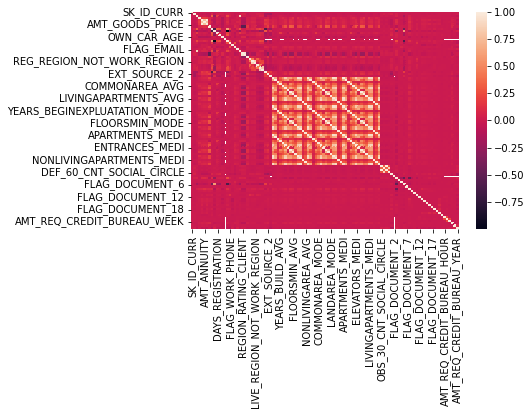

In [25]:
import seaborn as sns

correlations = train.corr()
sns.heatmap(correlations)

In [26]:
correlations = train.corr()["TARGET"].abs().sort_values()

print('High Correlations:\n', correlations.tail(15))
print('\nLow Correlations:\n', correlations.head(15))

High Correlations:
 FLOORSMAX_AVG                  0.044003
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
DAYS_EMPLOYED                  0.044932
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
EXT_SOURCE_1                   0.155317
EXT_SOURCE_2                   0.160472
EXT_SOURCE_3                   0.178919
TARGET                         1.000000
Name: TARGET, dtype: float64

Low Correlations:
 FLAG_DOCUMENT_20              0.000215
FLAG_DOCUMENT_5               0.000316
FLAG_CONT_MOBILE              0.000370
FLAG_MOBIL                    0.000534
FLAG_DOCUMENT_12              0.000756
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
FLAG_DOCUMENT_19              0.001358
FLAG_DOCUMENT_10   

In [29]:
tmp = correlations.head(15).to_frame()
tmp = tmp.index.to_list()
tmp.remove('SK_ID_CURR')
print (tmp)


# remove low correlated features 
train = train.drop(tmp, axis=1)
test = test.drop(tmp, axis=1)

print (train.shape)
print (test.shape)

['FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_5', 'FLAG_CONT_MOBILE', 'FLAG_MOBIL', 'FLAG_DOCUMENT_12', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_7', 'NONLIVINGAPARTMENTS_MODE', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_4']
(307511, 108)
(48744, 107)


In [30]:
X_train = train.loc[:, train.columns != 'TARGET']
Y_train  = train.loc[:,'TARGET']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list_f = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

for item in list_f:
  le.fit(X_train[item])
  X_train[item] = le.transform(X_train[item])
  test[item] = le.transform(test[item])

# missing value filiing 

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
imp.fit(X_train)
X_train = imp.transform(X_train)
test = imp.transform(test)
print (X_train)
print (test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[[1.00002e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [1.00003e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00004e+05 1.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [4.56253e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [4.56254e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.56255e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.00000e+00
  1.00000e+00]]
[[1.00001e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00005e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  3.00000e+00]
 [1.00013e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  4.00000e+00]
 ...
 [4.56223e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [4.56224e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [4.56250e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  4.00000e+00]]


In [31]:
# Split training set into training and validation set

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
print (X_tr.shape)
print (y_tr.shape)

scaler = StandardScaler()
scaler.fit(X_tr)
#transform both training and validation set
X_tr= scaler.transform(X_tr)
X_val= scaler.transform(X_val)
print (X_tr)

(230633, 107)
(230633,)
[[ 1.18494739 -0.32500539 -0.72160513 ... -0.05833452 -0.27009478
  -0.44049329]
 [-1.01963438  3.07687206  1.38563937 ... -0.05833452 -0.27009478
  -1.00650805]
 [-1.54486898 -0.32500539 -0.72160513 ... -0.05833452  0.8995248
   0.12552146]
 ...
 [-0.24553129 -0.32500539  1.38563937 ... -0.05833452  2.06914437
   0.69153621]
 [-0.07777542  3.07687206  1.38563937 ... -0.05833452 -0.27009478
  -0.44049329]
 [-0.35849604 -0.32500539  1.38563937 ... -0.05833452  0.8995248
  -1.00650805]]


In [32]:
reg2 = LogisticRegression(solver = 'newton-cg').fit(X_tr, y_tr)
prediction_reg2 = reg2.predict(X_val)
print ("Prediction of test set")

d = {'accuracy':[accuracy_score(y_val, prediction_reg2)], 
     'precision':[precision_score(y_val, prediction_reg2, average='macro')], 
     'recall':[recall_score(y_val, prediction_reg2, average='macro')], 
     'F1 score': [f1_score(y_val, prediction_reg2, average='macro')]}

evaluation_result = pd.DataFrame(data=d)
print (evaluation_result)
print ('Prediction probability for 2 classes: ')
prediction_prob = reg2.predict_proba(X_val)
print (prediction_prob)

Prediction of test set
   accuracy  precision    recall  F1 score
0  0.919054   0.652037  0.503679  0.487269
Prediction probability for 2 classes: 
[[0.76903381 0.23096619]
 [0.97437209 0.02562791]
 [0.8682978  0.1317022 ]
 ...
 [0.92679483 0.07320517]
 [0.84954837 0.15045163]
 [0.95726053 0.04273947]]


In [37]:
# create file version 2
# estimate for test data
X_test= scaler.transform(test)

print ('Prediction probability for test: ')
prediction_prob_test = reg2.predict_proba(X_test)


print (test)
data = {'SK_ID_CURR': test[:,0],
        'TARGET': prediction_prob_test[:,1]}
submission = pd.DataFrame(data)
submission['SK_ID_CURR'] = pd.to_numeric(submission['SK_ID_CURR'], downcast='integer')
submission.to_csv('Zolzaya_kaggle2.csv', index=False)
print('The file cannot upload to Kaggle dependencies of Kaggle verification error')


Prediction probability for test: 
[[1.00001e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00005e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  3.00000e+00]
 [1.00013e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  4.00000e+00]
 ...
 [4.56223e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [4.56224e+05 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  2.00000e+00]
 [4.56250e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  4.00000e+00]]
The file cannot upload to Kaggle dependencies of Kaggle verification error
